# Titanic: Machine Learning from Disaster

O desafio do Titanic é uma das competições mais famosas, e é promovida pelo site [kaggle.com](http://kaggle.com). Tamanha popularidade desta competição fez com que ela fosse considerada como sendo um ***Hello, World!*** para o universo fantástico do Data Science (Ciência de Dados).

Com certeza, a maioria de vocês conhece a história por trás do naufrágio deste que seria o *navio mais moderno do mundo* para a época. Apesar da tecnologia disponível, após colidir com um iceberg em 15 de abril de 1912, **seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.**

![Data Science, Python e Titanic](img/titanic.jpeg)

Como principal fator contribuinte, logo se descobriu que não havia botes salva-vidas suficientes para toda a tripulação e passageiros. 

Obviamente, aqueles que sobreviveram à tragédia contaram com muita sorte, mas será que alguns grupos de passageiros não tiveram "mais sorte" que outros grupos? Será que crianças e mulheres realmente tiveram mais chances de sobreviver? Será que o Jack teve menos chances de escapar do seu destino trágico que a Rose, só pelo fato de ele ter embarcado na 3ª Classe?

Com os dados **reais** disponibilizados, agora você pode fazer uma análise exploratória, testar suas hipóteses e até mesmo construir um modelo preditivo (que tal descobrir quais seriam suas chances de sobrevivência na 1ª Classe se você tivesse viajado com sua esposa e filho?!)

> **Resumidamente, o objetivo deste desafio é utilizar os dados disponíveis para medir a chance de sobrevivência dos passageiros do Titanic.** 

## Sobre este notebook

Este notebook é parte de uma série de artigos do meu blog, [sigmoidal.ai](http://sigmoidal.ai) e será atualizado a cada publicação no blog.

A ideia é introduzir o assunto de **DATA SCIENCE** para iniciantes na área, por isso tentei não me aprofundar em nenhum conceito ou análise, de maneira que seja possível reproduzir (e entender) todos passos usados.


## Checklist

1. Definição do Problema
2. Obtenção dos Dados
3. Exploração dos Dados
4. Preparação dos Dados
5. Modelagem
6. Avaliação

## 1. Definição do Problema

A construção do Titanic levou cerca de 2 anos e custou 7,5 milhões de dólares (valores da época). Com 269 metros de comprimento, 28 metros de largura e 53 metros de altura, operava com uma tripulação de 892 pessoas e poderia levar até 2435 passageiros (espalhados pelas três classes disponíveis).

Pensado para ser o mais seguro e luxuoso navio da época, foi lançado ao mar em 1911, ganhando fama de ser "inafundável".

A descrição completa da competição, assim como o conjunto de dados, está disponível na página do Kaggle [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic).

O naufrágio do Titanic teve como fatores contribuintes causas naturais (como o clima) e causas humanas (negligência e excesso de confiança). Independente das causas, o fato é que seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.

Embora aqueles que escaparam com vida tiveram sua boa dose de sorte, alguns grupos de pessoas eram mais propensos a escaparem da morte do que outros. Por exemplo, mulheres, crianças e passageiros da 1ª Classe. Assim, nota-se que existe algum padrão que pode ser extraído dos dados brutos.

### Objetivo

Espera-se que você consiga fazer uma **análise sobre quais variáveis tiveram maior influência na probabilidade de sobrevivência** (ou seja, que tipo de pessoa teve mais chance de escapar com vida).

Após analisar os dados, espera-se também que você seja capaz de **construir um modelo que dê a previsão de sobrevivência** para um passageiro qualquer que seja fornecido como *input*.


### Métrica de Desempenho

O *score* é calculado em relação ao número de previsões corretas que seu modelo fez. Ou seja, é considerada apenas a **acurácia** do modelo.


## 2. Obtenção dos Dados

[Os dados disponibilizados pelo Kaggle](https://www.kaggle.com/c/titanic/data) foram divididos em dois grupos:

* Dataset de treino (```train.csv```)
    * Deve ser usado para construir o modelo de Machine Learning. Neste conjunto de dados, é informado se o passageiro sobreviveu ou não. 
    * Composto por diversas *features* como gênero do passageiro e classe do embarque.
* Dataset de Teste (```test.csv```)
    * Deve ser usado como dados que nunca forma vistos pelo modelo. Neste conjunto de dados, não é informado se o passageiro sobreviveu ou não.
    
Também é disponibilizado um modelo (gabarito) de como as previsões devem ser enviadas para a plataforma do Kaggle (```gender_submission```).

Para conseguir baixar os arquivos, é precisar criar um login no Kaggle antes. Para facilitar, os arquivos estão junto com este notebook (pasta ```./data/...```

In [ ]:
# listar os arquivos no diretório
!tree

In [2]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

# renderizar os gráficos diretamento no notebook
%matplotlib inline

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

**Q1.** Quantas variáveis (colunas) e quantas entradas (linhas) possui o arquivo?

In [4]:
# verificando as dimensões do DataFrame
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))

Variáveis:	12
Entradas:	891


## 3. Exploração dos Dados

Em uma análise inicial, serão estudadas cada variável. É importante verificar seu nome, tipo, porcentagem de valores faltantes, presença de outliers e tipo de distribuição.

Como se trata de um Aprendizado Supervisionado (*Supervised Learning*), a variável ```Survived``` é definida como sendo a nossa variável alvo (*target*).

### Dicionário de Dados

* **PassengerId:** Número de identificação do passageiro
* **Survived:** Informa se o passageiro sobreviveu ao desastre
    * 0 = Não
    * 1 = Sim
* **Pclass:** Classe do bilhete
    * 1 = 1ª Classe
    * 2 = 2ª Classe
    * 3 = 3ª Classe
* **Name:** Nome do passageiro
* **Sex:** Sexo do passageiro
* **Age:** Idade do passageiro
* **SibSp:** Quantidade de cônjuges e irmãos a bordo
* **Parch:** Quantidade de pais e filhos a bordo
* **Ticket:** Número da passagem
* **Fare:** Preço da Passagem
* **Cabin:** Número da cabine do passageiro
* **Embarked:** Porto no qual o passageiro embarcou
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

**Q1. Quais os tipos de cada variável?**

* Variáveis Numéricas
    * Discretas
        * Pclass
        * SibSp
        * Parch
    * Contínuas
        * Age
        * Fare
    * Alvo
        * Survived
    * Chave Primária
        * PassengerId
* Variáveis Categóricas
    * Name
    * Sex
    * Ticket
    * Cabin
    * Embarked

In [5]:
# identificar o tipo de cada variável
display(train.dtypes)

# ver as 5 primeiras entradas do conjunto de treino
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Q2. Qual a porcentagem de valores faltantes?**

A informação sobre a **Cabin** é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna **Age** não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque (**Embarked**) possui apenas 2% de informações faltantes.

In [6]:
# ver a porcentagem valores faltantes
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

**Q3. Como é a distribuição estatística dos dados?**

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


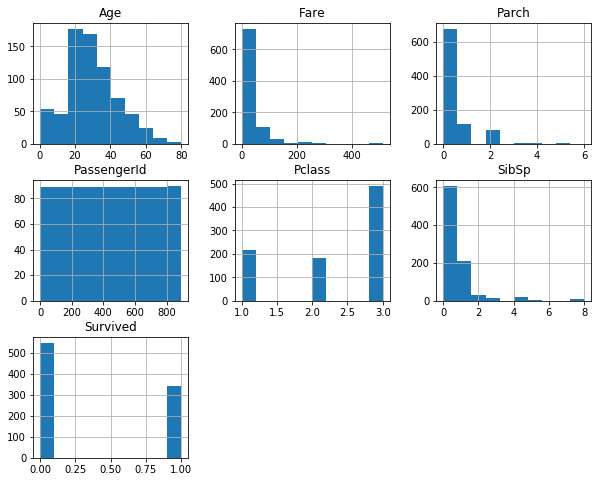

In [19]:
# ver histograma das variáveis numéricas
train.hist(figsize=(10,8));

**Q4. Quais grupos de pessoas tinham mais chances de sobevivência?**

In [20]:
# Analisar a probabilidade de sobrevivência pelo Sexo
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


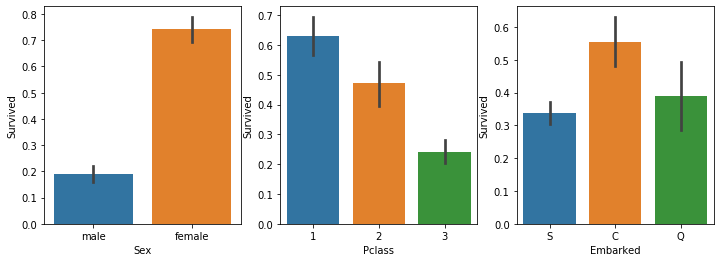

In [21]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

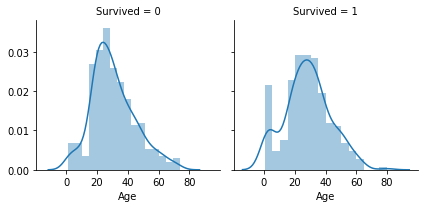

In [72]:
# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

# CONTINUA NO PRÓXIMO ARTIGO...